In [23]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
df = pd.read_csv("amazon_products.csv")
df.head()

,asin,title,imgUrl,productURL,stars,reviews,price,listPrice,category_id,isBestSeller,boughtInLastMonth
0,B014TMV5YE,"Sion Softside Expandable Roller Luggage, Black...",https://m.media-amazon.com/images/I/815dLQKYIY...,https://www.amazon.com/dp/B014TMV5YE,4.5,0,139.99,0.00,104,False,2000
1,B07GDLCQXV,Luggage Sets Expandable PC+ABS Durable Suitcas...,https://m.media-amazon.com/images/I/81bQlm7vf6...,https://www.amazon.com/dp/B07GDLCQXV,4.5,0,169.99,209.99,104,False,1000
2,B07XSCCZYG,Platinum Elite Softside Expandable Checked Lug...,https://m.media-amazon.com/images/I/71EA35zvJB...,https://www.amazon.com/dp/B07XSCCZYG,4.6,0,365.49,429.99,104,False,300
3,B08MVFKGJM,Freeform Hardside Expandable with Double Spinn...,https://m.media-amazon.com/images/I/91k6NYLQyI...,https://www.amazon.com/dp/B08MVFKGJM,4.6,0,291.59,354.37,104,False,400
4,B01DJLKZBA,Winfield 2 Hardside Expandable Luggage with Sp...,https://m.media-amazon.com/images/I/61NJoaZcP9...,https://www.amazon.com/dp/B01DJLKZBA,4.5,0,174.99,309.99,104,False,400


In [25]:
df.price.unique()

array([139.99, 169.99, 365.49, ..., 205.16, 113.12, 197.61])

In [26]:
df.listPrice.unique()

array([  0.  , 209.99, 429.99, ..., 214.58,  84.19, 215.73])

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426337 entries, 0 to 1426336
Data columns (total 11 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   asin               1426337 non-null  object 
 1   title              1426336 non-null  object 
 2   imgUrl             1426337 non-null  object 
 3   productURL         1426337 non-null  object 
 4   stars              1426337 non-null  float64
 5   reviews            1426337 non-null  int64  
 6   price              1426337 non-null  float64
 7   listPrice          1426337 non-null  float64
 8   category_id        1426337 non-null  int64  
 9   isBestSeller       1426337 non-null  bool   
 10  boughtInLastMonth  1426337 non-null  int64  
dtypes: bool(1), float64(3), int64(3), object(4)
memory usage: 110.2+ MB


In [28]:
df.isna().sum()

asin                 0
title                1
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [29]:
df2 = df.dropna()
df2.isna().sum()

asin                 0
title                0
imgUrl               0
productURL           0
stars                0
reviews              0
price                0
listPrice            0
category_id          0
isBestSeller         0
boughtInLastMonth    0
dtype: int64

In [30]:
df2.shape

(1426336, 11)

In [31]:
df2.describe()

,stars,reviews,price,listPrice,category_id,boughtInLastMonth
count,1.426336e+06,1.426336e+06,1.426336e+06,1.426336e+06,1.426336e+06,1.426336e+06
mean,3.999511e+00,1.807509e+02,4.337541e+01,1.244917e+01,1.237410e+02,1.419824e+02
std,1.344293e+00,1.761454e+03,1.302893e+02,4.611200e+01,7.311271e+01,8.362722e+02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00
25%,4.100000e+00,0.000000e+00,1.199000e+01,0.000000e+00,6.500000e+01,0.000000e+00
50%,4.400000e+00,0.000000e+00,1.995000e+01,0.000000e+00,1.200000e+02,0.000000e+00
75%,4.600000e+00,0.000000e+00,3.599000e+01,0.000000e+00,1.760000e+02,5.000000e+01
max,5.000000e+00,3.465630e+05,1.973181e+04,9.999900e+02,2.700000e+02,1.000000e+05


# Explorasi Data Analis (EDA)

1. Analisis Harga dan Penjualan

    Mengamati bagaimana harga dan harga diskon memengaruhi jumlah pembelian dalam sebulan

    Menentukan harga optimal untuk memaksimalkan penjualan.


2. Analisis Korelasi Rating dengan Penjualan

    Meneliti apakah produk dengan rating tinggi memiliki lebih banyak pembelian.


3. Identifikasi Produk Terlaris

    Melihat produk dengan jumlah pembelian tertinggi untuk memahami tren pasar.


4. Perbandingan Produk dengan Diskon dan tanpa Diskon

    Menganalisis apakah produk dengan diskon lebih menarik pembeli dibandingkan yang tidak memiliki diskon.

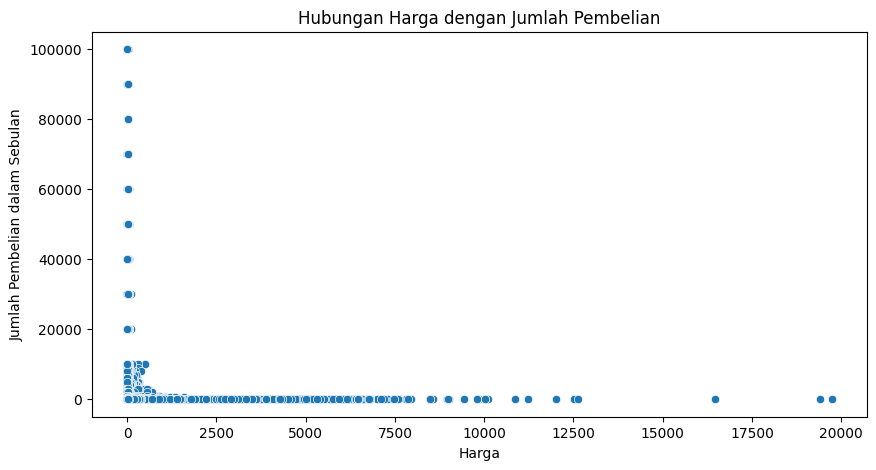

In [32]:
# 1. Analisis Harga dan Pembelian
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df2['price'], y=df2['boughtInLastMonth'])
plt.xlabel('Harga')
plt.ylabel('Jumlah Pembelian dalam Sebulan')
plt.title('Hubungan Harga dengan Jumlah Pembelian')
plt.show()

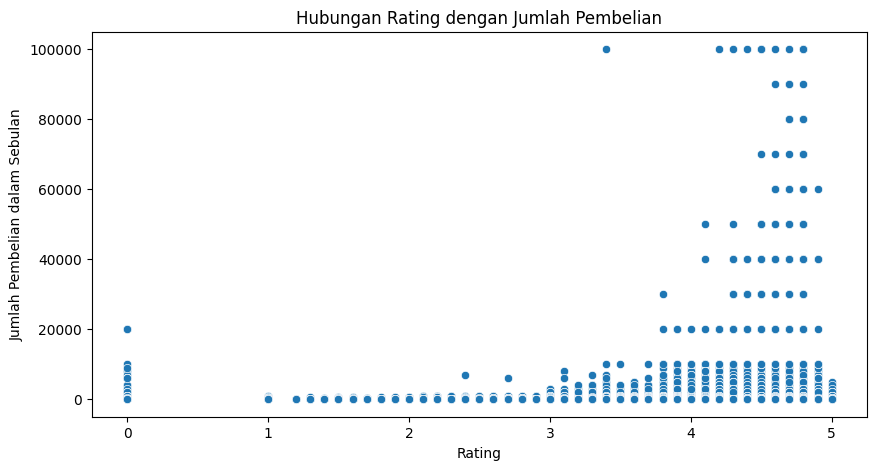

In [33]:
# 2. Analisis korelasi rating dengan penjualan
plt.figure(figsize=(10, 5))
sns.scatterplot(x=df2['stars'], y=df2['boughtInLastMonth'])
plt.xlabel('Rating')
plt.ylabel('Jumlah Pembelian dalam Sebulan')
plt.title('Hubungan Rating dengan Jumlah Pembelian')
plt.show()

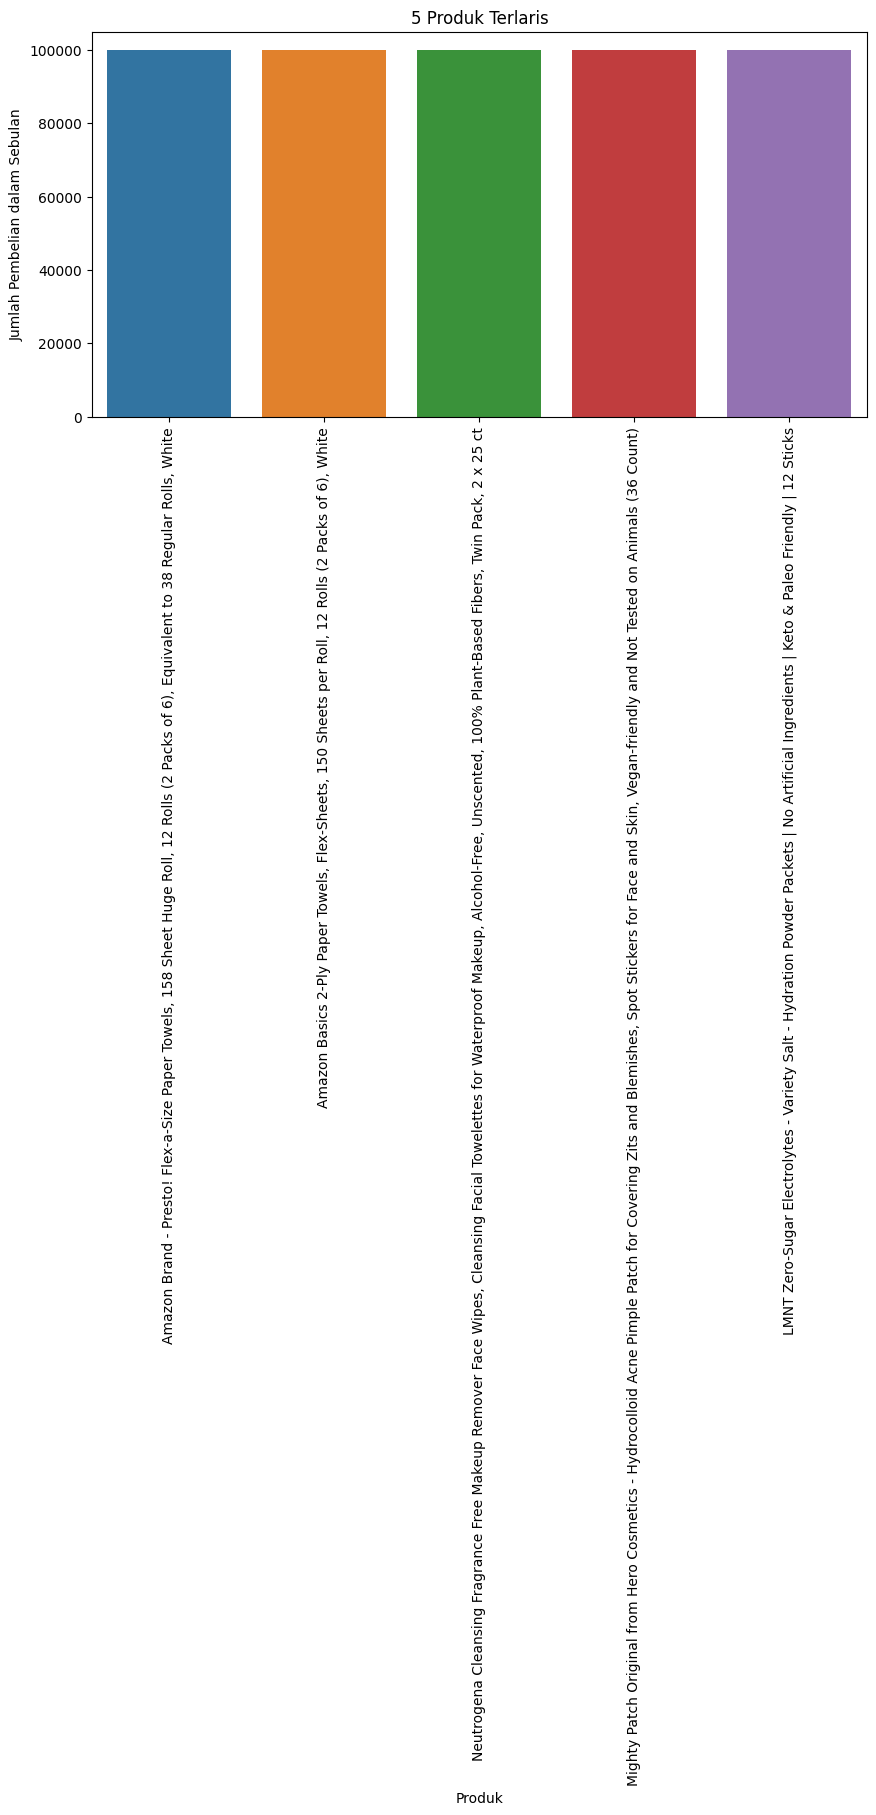

In [34]:
# 3. Identifikasi produk terlaris
top_selling = df2.sort_values(by='boughtInLastMonth', ascending=False).head(5)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_selling['title'], y=top_selling['boughtInLastMonth'])
plt.xticks(rotation=90)
plt.xlabel('Produk')
plt.ylabel('Jumlah Pembelian dalam Sebulan')
plt.title('5 Produk Terlaris')
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_9292\627908979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['has_discount'] = df2['listPrice'] > df2['price']


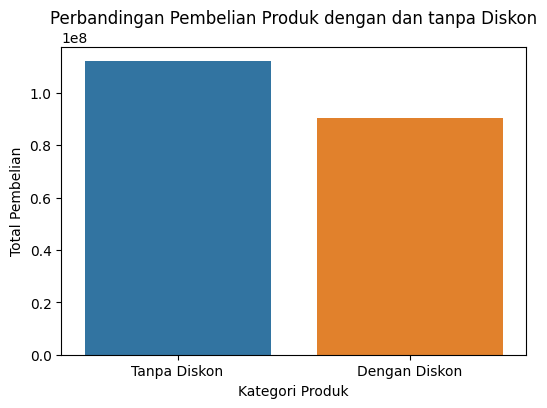

In [35]:
# 4. Perbandingan Produk dengan Diskon dan tanpa Diskon
df2['has_discount'] = df2['listPrice'] > df2['price']
discount_sales = df2.groupby('has_discount')['boughtInLastMonth'].sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=discount_sales.index, y=discount_sales.values)
plt.xticks(ticks=[0, 1], labels=['Tanpa Diskon', 'Dengan Diskon'])
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pembelian')
plt.title('Perbandingan Pembelian Produk dengan dan tanpa Diskon')
plt.show()

Analisis ini bisa membantu dalam:

1. Menentukan strategi harga optimal untuk meningkatkan penjualan.

2. Memastikan bahwa rating produk tetap tinggi untuk meningkatkan kepercayaan pembeli.

3. Memahami produk yang paling laris untuk menentukan stok dan strategi pemasaran.

4. Menentukan apakah diskon merupakan strategi efektif dalam meningkatkan penjualan.

# Machine Learning

### Preprocessing Data 

In [36]:
# Mengisi missing values
df2.fillna({'price': df2['price'].median(), 
           'listPrice': df2['listPrice'].median(),
           'stars': df2['stars'].median()}, inplace=True)

C:\Users\hp\AppData\Local\Temp\ipykernel_9292\1061830738.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.fillna({'price': df2['price'].median(),


### Feature Engineering

In [37]:
# Fitur baru: diskon dan rasio diskon
df2['discount'] = df2['listPrice'] - df2['price']
df2['discount_ratio'] = df2['price'] / (df2['listPrice'] + 1e-5)

C:\Users\hp\AppData\Local\Temp\ipykernel_9292\177252395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['discount'] = df2['listPrice'] - df2['price']
C:\Users\hp\AppData\Local\Temp\ipykernel_9292\177252395.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['discount_ratio'] = df2['price'] / (df2['listPrice'] + 1e-5)


In [38]:
# Memilih fitur yang relevan
features = ['stars', 'price', 'listPrice', 'discount', 'discount_ratio', 'category_id']
X = df2[features]
y = df2['isBestSeller']

In [39]:
X.head(3)

,stars,price,listPrice,discount,discount_ratio,category_id
0,4.5,139.99,0.00,-139.99,1.399900e+07,104
1,4.5,169.99,209.99,40.00,8.095147e-01,104
2,4.6,365.49,429.99,64.50,8.499965e-01,104


In [40]:
y.head(3)

0    False
1    False
2    False
Name: isBestSeller, dtype: bool

In [41]:
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [42]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### Model XGBoost

In [43]:
model = XGBClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

### Evaluasi model

In [44]:
y_pred = model.predict(X_test)
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.9941178120223789


c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

       False       0.99      1.00      1.00    283590
        True       0.00      0.00      0.00      1678

    accuracy                           0.99    285268
   macro avg       0.50      0.50      0.50    285268
weighted avg       0.99      0.99      0.99    285268



c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
